In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#!pip install wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.


Signal shape: (650000, 2)
Sampling frequency: 360
Channel names: ['MLII', 'V5']


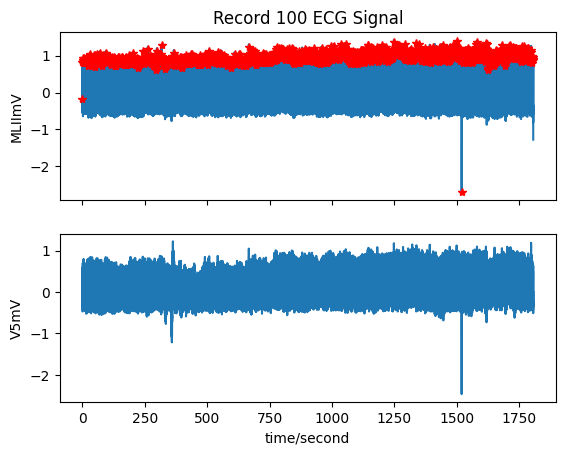

In [6]:
import wfdb
import os

# Set the path to your local MITDB folder
data_path = r'/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0'

# Choose a record name (without extension)
record_name = '100'

# Construct full path (without extension)
record_path = os.path.join(data_path, record_name)

# Read the signal
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')

# Display information
print("Signal shape:", record.p_signal.shape)
print("Sampling frequency:", record.fs)
print("Channel names:", record.sig_name)

# Optional: Plot signal with annotations
wfdb.plot_wfdb(record=record, annotation=annotation,
               title=f"Record {record_name} ECG Signal")


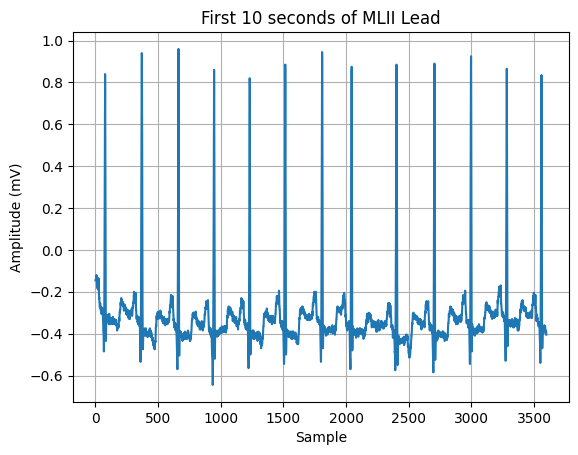

In [7]:
import matplotlib.pyplot as plt

# Plot the first 10 seconds of the first lead (MLII)
seconds = 10
samples = 360 * seconds
plt.plot(record.p_signal[:samples, 0])  # 0 for MLII
plt.title("First 10 seconds of MLII Lead")
plt.xlabel("Sample")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.show()


In [8]:
# Print first 10 annotations
for i in range(10):
    print(f"Sample: {annotation.sample[i]}, Label: {annotation.symbol[i]}")


Sample: 18, Label: +
Sample: 77, Label: N
Sample: 370, Label: N
Sample: 662, Label: N
Sample: 946, Label: N
Sample: 1231, Label: N
Sample: 1515, Label: N
Sample: 1809, Label: N
Sample: 2044, Label: A
Sample: 2402, Label: N


In [9]:
from collections import Counter

beat_counts = Counter(annotation.symbol)
print(beat_counts)


Counter({'N': 2239, 'A': 33, '+': 1, 'V': 1})


In [10]:
import os
import wfdb
from collections import Counter

# Path to your MIT-BIH folder
data_path = r'/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0'

# Get all record base names (e.g., 100, 101, 102...) by checking for .atr files
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Counter to hold all symbols
total_counts = Counter()

for record_name in record_names:
    record_path = os.path.join(data_path, record_name)
    try:
        ann = wfdb.rdann(record_path, 'atr')
        total_counts.update(ann.symbol)
    except Exception as e:
        print(f"Error reading {record_name}: {e}")

# Print summary
print("Annotation Counts Across All Records:\n")
for symbol, count in total_counts.most_common():
    print(f"{symbol}: {count}")


Annotation Counts Across All Records:

N: 75151
/: 9056
L: 8075
R: 7259
V: 7134
A: 2546
+: 1296
f: 1038
F: 803
~: 616
!: 472
": 437
j: 229
x: 193
a: 150
|: 132
E: 106
J: 83
Q: 33
e: 16
[: 6
]: 6
S: 2


| Symbol   | Meaning                                            | Class Type                 |       |
| -------- | -------------------------------------------------- | -------------------------- | ----- |
| **N**    | Normal beat                                        | Normal                     |       |
| **L**    | Left bundle branch block beat                      | Arrhythmia                 |       |
| **R**    | Right bundle branch block beat                     | Arrhythmia                 |       |
| **V**    | Premature ventricular contraction (PVC)            | Arrhythmia                 |       |
| **A**    | Atrial premature beat                              | Arrhythmia                 |       |
| **/ /**  | Paced beat                                         | Pacing                     |       |
| **f**    | Fusion of paced and normal beat                    | Rare/Arrhythmia            |       |
| **F**    | Fusion of ventricular and normal beat              | Rare/Arrhythmia            |       |
| **!**    | Ventricular flutter wave                           | Rare arrhythmia            |       |
| **\~**   | Signal quality change                              | Noise/Artifact             |       |
| **+**    | New segment (typically every 10 minutes)           | Not a beat                 |       |
| **"**    | Rhythm change annotation                           | Not a beat                 |       |
| **j**    | Nodal (junctional) escape beat                     | Rare arrhythmia            |       |
| **x**    | Non-conducted P-wave (blocked beat)                | Rare arrhythmia            |       |
| **a**    | Aberrated atrial premature beat                    | Rare arrhythmia            |       |
| \*\*     | \*\*                                               | Isolated QRS-like artifact | Noise |
| **E**    | Ventricular escape beat                            | Rare arrhythmia            |       |
| **J**    | Nodal (junctional) premature beat                  | Rare arrhythmia            |       |
| **Q**    | Unclassifiable beat                                | Noise or unknown           |       |
| **e**    | Atrial escape beat                                 | Rare arrhythmia            |       |
| **\[ ]** | Start/end of supra-ventricular tachycardia episode | Rhythm marker              |       |
| **S**    | Asystole                                           | Very rare/emergency        |       |


| Label | Symbol(s)     | Description                        |
| ----- | ------------- | ---------------------------------- |
| 0     | `N`           | Normal beat                        |
| 1     | `L`, `R`      | Bundle branch block beats          |
| 2     | `A`, `a`, `J` | Atrial/nodal premature beats       |
| 3     | `V`, `F`      | Premature ventricular contractions |
| 4     | Others/Noise  | `e`, `E`, `/`, `f`, `!`, `~`, etc. |


In [11]:
import os
import wfdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter, defaultdict

# Set up your data path
data_path = r'/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0'

# Get record names (based on .atr files)
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Track beat counts, signal lengths, channel info
all_annotations = []
signal_lengths = []
record_info = []

symbol_counter = Counter()
record_beat_distribution = defaultdict(Counter)

for record_name in record_names:
    record_path = os.path.join(data_path, record_name)
    try:
        # Read signal and annotations
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        # Update counters
        symbol_counter.update(annotation.symbol)
        signal_lengths.append((record_name, len(record.p_signal)))
        record_beat_distribution[record_name].update(annotation.symbol)

        # Save detailed annotations
        for sample, symbol in zip(annotation.sample, annotation.symbol):
            if symbol in ['N', 'L', 'R', 'A', 'V', 'F', 'e', 'j', 'a', 'E', 'J']:
                all_annotations.append({
                    'record': record_name,
                    'sample': sample,
                    'symbol': symbol,
                    'fs': record.fs,
                    'channel_names': record.sig_name
                })

        # Save record info
        record_info.append({
            'record': record_name,
            'length': len(record.p_signal),
            'channels': record.sig_name,
            'sampling_rate': record.fs
        })

    except Exception as e:
        print(f"Error reading {record_name}: {e}")



Error reading 102-0: [Errno 2] No such file or directory: '/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0/102-0.hea'


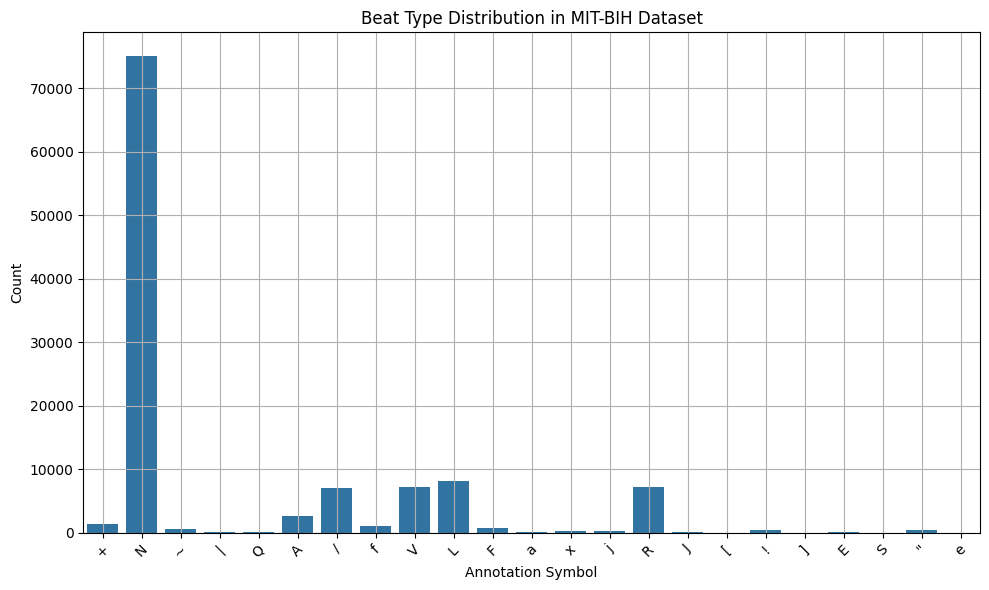

In [12]:
# Plot distribution of beat types
plt.figure(figsize=(10, 6))
sns.barplot(x=list(symbol_counter.keys()), y=list(symbol_counter.values()))
plt.title("Beat Type Distribution in MIT-BIH Dataset")
plt.xlabel("Annotation Symbol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


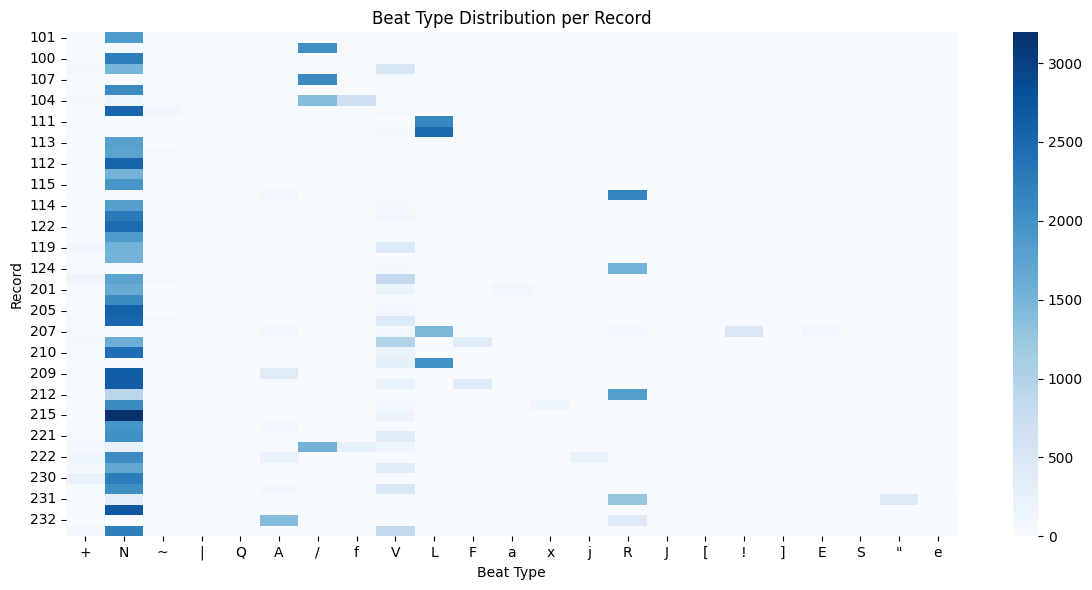

In [13]:
# Convert to DataFrame
beat_dist_df = pd.DataFrame(record_beat_distribution).fillna(0).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(beat_dist_df, cmap='Blues', annot=False, cbar=True)
plt.title("Beat Type Distribution per Record")
plt.xlabel("Beat Type")
plt.ylabel("Record")
plt.tight_layout()
plt.show()


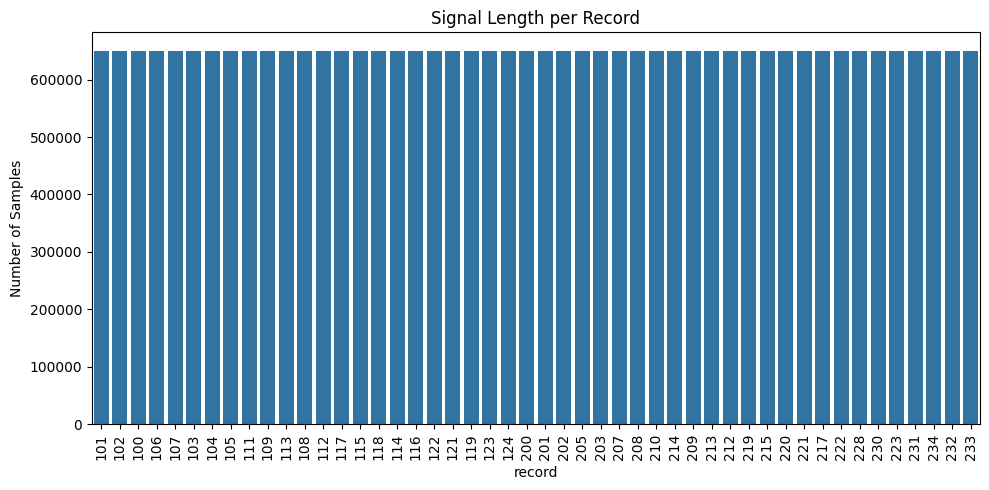

In [14]:
signal_df = pd.DataFrame(signal_lengths, columns=['record', 'length'])

plt.figure(figsize=(10, 5))
sns.barplot(data=signal_df, x='record', y='length')
plt.xticks(rotation=90)
plt.title("Signal Length per Record")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


In [15]:
import os
import wfdb
import numpy as np
import pandas as pd

# Set your data path
data_path = r'/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0'
output_dir = r'/content/drive/My Drive/ecg_record_segments'
os.makedirs(output_dir, exist_ok=True)

# Only include the most relevant beat types
valid_symbols = ['N', 'L', 'R', 'A', 'V', 'F', 'e', 'j', 'a', 'E', 'J']

# Window size
window_before = 72
window_after = 144
segment_length = window_before + window_after

# Get record names
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Loop through records
for record_name in record_names:
    try:
        record_path = os.path.join(data_path, record_name)
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        signal = record.p_signal[:, 0]  # MLII channel

        segments = []
        labels = []

        for sample, symbol in zip(annotation.sample, annotation.symbol):
            if symbol not in valid_symbols:
                continue

            start = sample - window_before
            end = sample + window_after

            if start >= 0 and end <= len(signal):
                segment = signal[start:end]
                if len(segment) == segment_length:
                    segments.append(segment)
                    labels.append(symbol)

        # Save this record's data if there are any segments
        if segments:
            df = pd.DataFrame(segments)
            df['label'] = labels
            df.to_csv(os.path.join(output_dir, f"{record_name}_segments.csv"), index=False)
            print(f" Saved segments for record {record_name}")

    except Exception as e:
        print(f" Error with record {record_name}: {e}")


 Saved segments for record 101
 Error with record 102-0: [Errno 2] No such file or directory: '/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0/102-0.hea'
 Saved segments for record 102
 Saved segments for record 100
 Saved segments for record 106
 Saved segments for record 107
 Saved segments for record 103
 Saved segments for record 104
 Saved segments for record 105
 Saved segments for record 111
 Saved segments for record 109
 Saved segments for record 113
 Saved segments for record 108
 Saved segments for record 112
 Saved segments for record 117
 Saved segments for record 115
 Saved segments for record 118
 Saved segments for record 114
 Saved segments for record 116
 Saved segments for record 122
 Saved segments for record 121
 Saved segments for record 119
 Saved segments for record 123
 Saved segments for record 124
 Saved segments for record 200
 Saved segments for record 201
 Saved segments for record 202
 Saved segments for record 205
 Saved segments for re

In [ ]:
import os
import pandas as pd

# Input folder where individual record segment files are saved
input_dir = '/content/drive/My Drive/ecg_record_segments'

# Output path where combined CSV will be stored
output_path = '/content/drive/My Drive/mizoram/ecg_all_segments_combined.csv'

# Combine all CSVs
combined_df = pd.DataFrame()

for filename in os.listdir(input_dir):
    if filename.endswith('_segments.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)
        df['record'] = filename.split('_segments')[0]  # Add record name column
        combined_df = pd.concat([combined_df, df], ignore_index=True)

# Save the full dataset
combined_df.to_csv(output_path, index=False)
print(f" Combined dataset saved to: {output_path}")
print(f" Final shape: {combined_df.shape}")


 Combined dataset saved to: /content/drive/My Drive/mizoram/ecg_all_segments_combined.csv
 Final shape: (101416, 218)


In [ ]:
print(combined_df.head())


       0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.265 -0.285 -0.300 -0.320 -0.325 -0.300 -0.300 -0.305 -0.305 -0.320  ...   
1 -0.105 -0.115 -0.125 -0.145 -0.145 -0.130 -0.130 -0.150 -0.155 -0.170  ...   
2 -0.120 -0.115 -0.125 -0.115 -0.095 -0.090 -0.090 -0.100 -0.115 -0.125  ...   
3 -0.255 -0.245 -0.235 -0.245 -0.255 -0.250 -0.255 -0.255 -0.250 -0.255  ...   
4 -0.095 -0.135 -0.175 -0.165 -0.155 -0.145 -0.145 -0.140 -0.140 -0.150  ...   

     208    209    210    211    212    213    214    215  label  record  
0 -0.365 -0.355 -0.350 -0.355 -0.360 -0.365 -0.355 -0.355      N     104  
1 -0.195 -0.190 -0.170 -0.180 -0.170 -0.190 -0.195 -0.170      N     104  
2 -0.155 -0.155 -0.145 -0.155 -0.170 -0.165 -0.155 -0.145      N     104  
3 -0.340 -0.350 -0.325 -0.300 -0.300 -0.315 -0.325 -0.335      N     104  
4 -0.145 -0.140 -0.170 -0.195 -0.215 -0.210 -0.180 -0.150      N     104  

[5 rows x 218 columns]


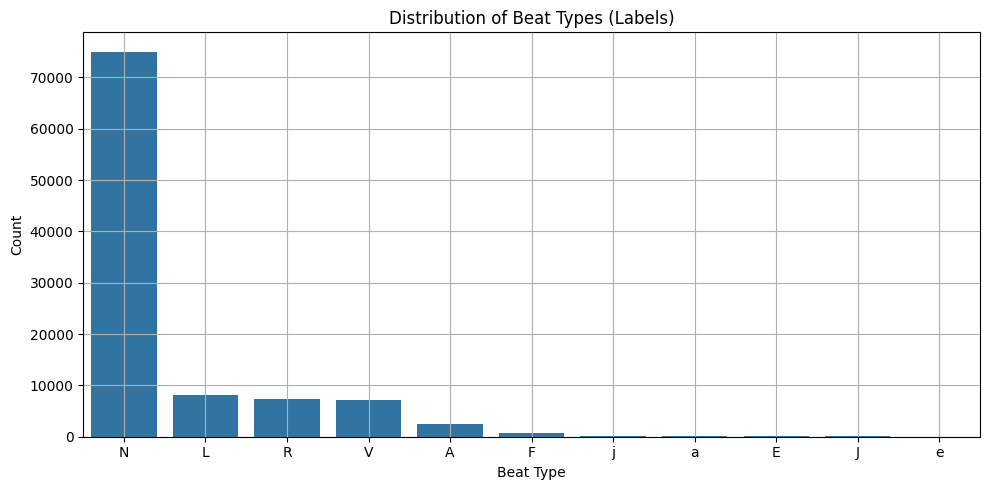

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=combined_df, order=combined_df['label'].value_counts().index)
plt.title("Distribution of Beat Types (Labels)")
plt.xlabel("Beat Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Sample ECG segment row shape:", combined_df.iloc[0, :-2].shape)


Sample ECG segment row shape: (216,)


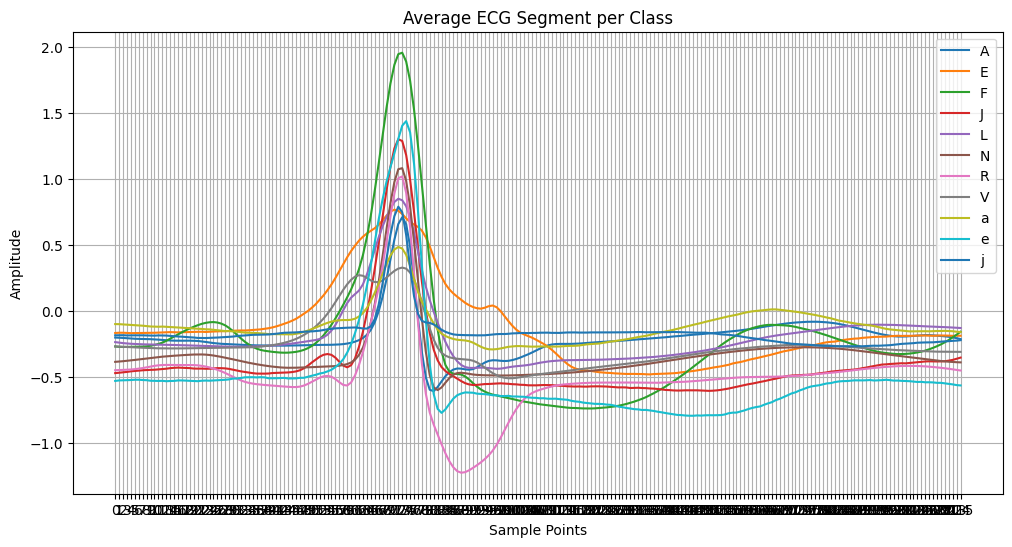

In [ ]:
label_groups = combined_df.groupby('label')
segment_columns = combined_df.columns[:-2]  # all 216 features

plt.figure(figsize=(12, 6))
for label, group in label_groups:
    mean_waveform = group[segment_columns].mean()
    plt.plot(mean_waveform, label=label)

plt.title("Average ECG Segment per Class")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming you've already loaded the combined_df
label_counts = combined_df['label'].value_counts()
print(" Unique labels and their counts:")
print(label_counts)


 Unique labels and their counts:
label
N    75028
L     8072
R     7255
V     7129
A     2546
F      802
j      229
a      150
E      106
J       83
e       16
Name: count, dtype: int64


Signal shape: (650000, 2)
Sampling frequency: 360
Channel names: ['MLII', 'V5']


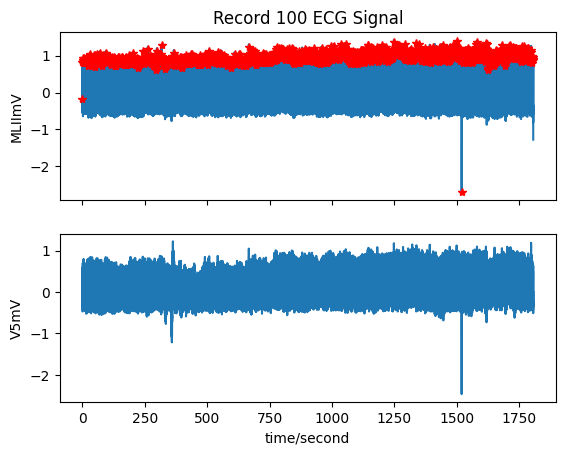

In [ ]:
import wfdb
import os

# Set the path to your local MITDB folder
data_path = r'/content/drive/My Drive/mizoram/mit-bih-arrhythmia-database-1.0.0'

# Choose a record name (without extension)
record_name = '100'

# Construct full path (without extension)
record_path = os.path.join(data_path, record_name)

# Read the signal
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')

# Display information
print("Signal shape:", record.p_signal.shape)
print("Sampling frequency:", record.fs)
print("Channel names:", record.sig_name)

# Optional: Plot signal with annotations
wfdb.plot_wfdb(record=record, annotation=annotation,
               title=f"Record {record_name} ECG Signal")


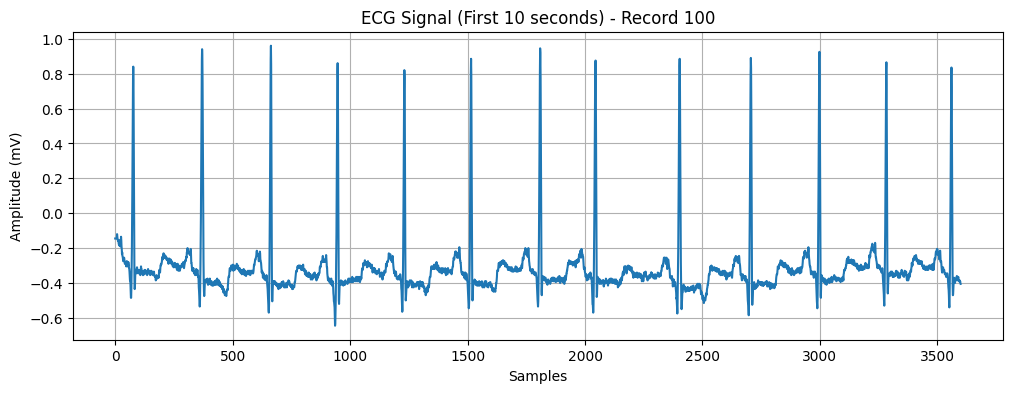

In [ ]:
import matplotlib.pyplot as plt

# Plot a short segment (e.g., first 10 seconds)
start = 0
end = int(record.fs * 10)  # 10 seconds of data

plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[start:end, 0])  # Plot channel 0
plt.title(f"ECG Signal (First 10 seconds) - Record {record_name}")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.show()


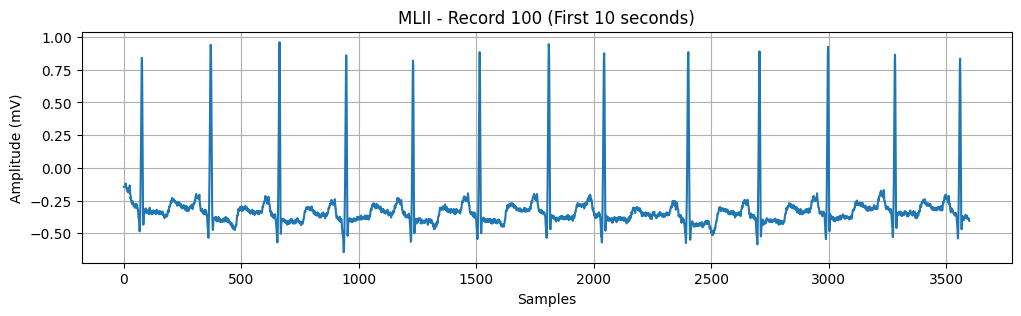

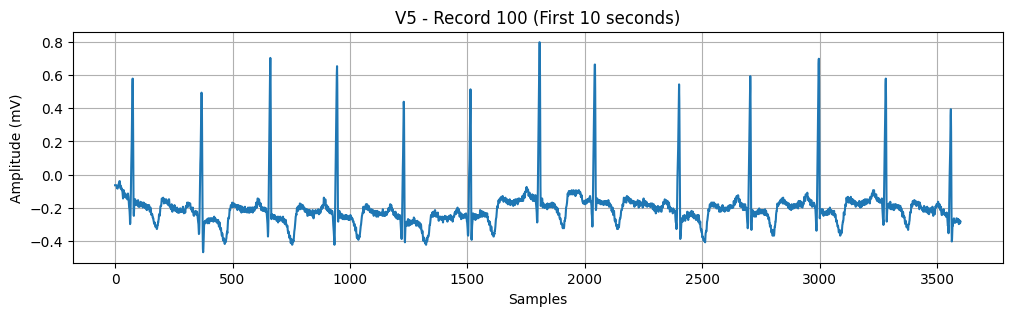

In [ ]:
# Plot all channels separately
for i, channel_name in enumerate(record.sig_name):
    plt.figure(figsize=(12, 3))
    plt.plot(record.p_signal[start:end, i])
    plt.title(f"{channel_name} - Record {record_name} (First 10 seconds)")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)
    plt.show()


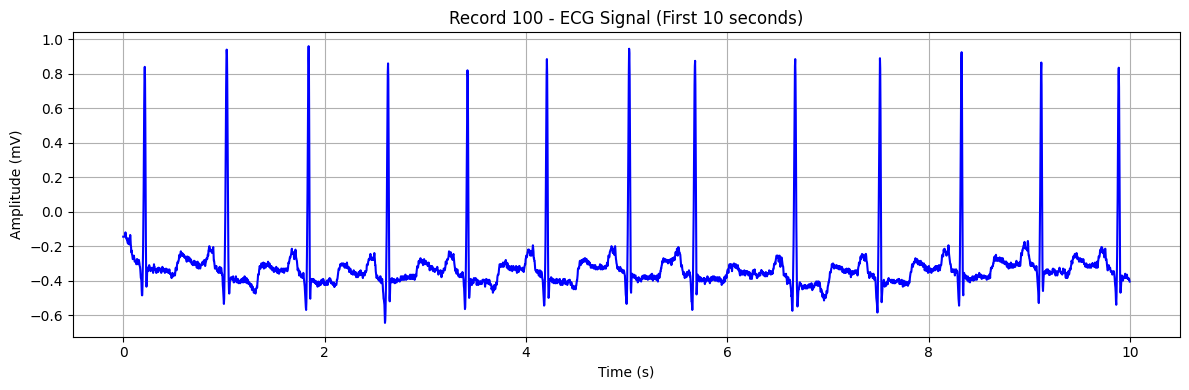

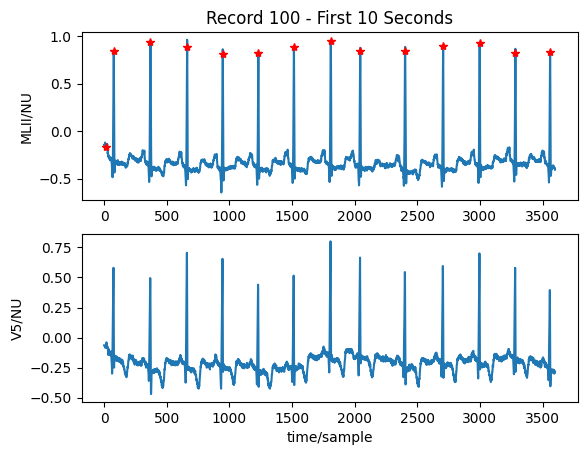

In [ ]:
import matplotlib.pyplot as plt

# Select a 10-second segment
fs = record.fs
start = 0
end = int(fs * 10)

signal = record.p_signal[start:end, 0]  # Channel 0

plt.figure(figsize=(12, 4))
plt.plot(np.arange(start, end) / fs, signal, color='blue')
plt.title(f"Record {record_name} - ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.tight_layout()
plt.show()
from wfdb.plot import plot_items

from wfdb.plot import plot_items
import wfdb

# Read a short segment of the record
fs = record.fs
start = 0
end = int(fs * 10)  # 10 seconds

segment_record = wfdb.rdrecord(record_path, sampfrom=start, sampto=end)
segment_ann = wfdb.rdann(record_path, 'atr', sampfrom=start, sampto=end)

# Wrap the annotations list correctly
plot_items(
    signal=segment_record.p_signal,
    ann_samp=[segment_ann.sample],  # ✅ wrap in list
    fs=segment_record.fs,
    sig_name=segment_record.sig_name,
    title=f"Record {record_name} - First 10 Seconds"
)



In [ ]:
print("Signal shape:", record.p_signal.shape)
print("First 5 samples of Channel 0:", record.p_signal[:5, 0])


Signal shape: (650000, 2)
First 5 samples of Channel 0: [-0.145 -0.145 -0.145 -0.145 -0.145]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, Activation, Bidirectional, GRU,
                                     Dense, GlobalAveragePooling1D, Multiply, Concatenate, Dropout, Layer)
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
csv_path = '/content/drive/My Drive/mizoram/ecg_all_segments_combined.csv'
df = pd.read_csv(csv_path)

# Prepare features and labels
X = df.drop(columns=['label', 'record']).values
y = df['label'].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # For Conv1D

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

# Attention layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# TCN Block
def TCN_Block(x, filters, kernel_size, dilation_rate):
    for i in range(2):
        x = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    return x

# Model architecture
input_layer = Input(shape=(X_train.shape[1], 1))

# TCN Path
x_tcn = TCN_Block(input_layer, filters=64, kernel_size=3, dilation_rate=1)
x_tcn = TCN_Block(x_tcn, filters=64, kernel_size=3, dilation_rate=2)
x_tcn = GlobalAveragePooling1D()(x_tcn)

# BiGRU Path
x_bigru = Bidirectional(GRU(64, return_sequences=True))(input_layer)
x_bigru = Attention()(x_bigru)

# Fusion
fusion = Concatenate()([x_tcn, x_bigru])
fusion = Dropout(0.5)(fusion)
fusion = Dense(128, activation='relu')(fusion)
fusion = Dropout(0.3)(fusion)
output_layer = Dense(y_train.shape[1], activation='softmax')(fusion)

# Build model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=le.classes_))
print("\nTest Accuracy:", accuracy_score(y_true, y_pred_classes))

# Save model and label encoder
model.save('/content/drive/My Drive/mizoram/ecg_tcn_bigru_attention_model.h5')
import joblib
joblib.dump(le, '/content/drive/My Drive/mizoram/label_encoder.pkl')
joblib.dump(scaler, '/content/drive/My Drive/mizoram/ecg_scaler.pkl')

In [ ]:



# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save model and label encoder